In [3]:
# Remember to update your path
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('/home/runmin/Documents/Qishi/QishiQR')

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_Offsets import MajorContracts
from Utils.MajorContract_split import MajorContracts


import warnings
warnings.filterwarnings(action='ignore')


from config import RbConfig

def Generate_Direction(mj, price='LastPrice', threshold = np.linspace(1,15,num=(15.-1)/2+1)):
    result = pd.DataFrame(index=mj.index)
    for thx in threshold:
        result[round(thx,1)] = mj[price].diff().apply(lambda x: 2 if x > thx 
                                            else (1 if x < -thx else 0))
    return result
 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


----

# 1. Price-change 

In [4]:

# ====== Initial Configuration - Bu 5min ========
params = RbConfig(frequency=5, price='MidPrice')

mj5 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset, price='MidPrice')

mj_train_5, mj_test_5, ptb_5 = mj5.create_major_overlap()

PT_5 = Generate_Direction(mj_train_5, price='MidPrice')
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_5 = PT_5.apply(pd.value_counts).T
Value_Prob_5 = Value_Prob_5.div(Value_Prob_5.sum(axis=1), axis=0)

rb1605 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1605 ['2015-11-1', '2016-3-31'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
rb1610 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1610 ['2016-3-1', '2016-8-31'] 2016-03-01 00:00:00 2016-08-01 00:00:00
probability table:  20160301.0 20160729.0
rb1701 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1701 ['2016-6-1', '2016-12-15'] 2016-08-01 00:00:00 2016-11-25 00:00:00
rb1705 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1705 ['2016-11-1', '2017-3-31'] 2016-11-25 00:00:00 2016-12-31 00:00:00


In [6]:
# ====== Initial Configuration - Bu 15min ========
params = RbConfig(frequency=10, price='MidPrice')

mj10 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset, price=params.price)

mj_train_10, mj_test_10, ptb_10 = mj10.create_major_overlap()

PT_10 = Generate_Direction(mj_train_10, price=params.price)
Frequency_Count = PT_10.apply(pd.value_counts).T

Value_Prob_10 = PT_10.apply(pd.value_counts).T
Value_Prob_10 = Value_Prob_10.div(Value_Prob_10.sum(axis=1), axis=0)

rb1605 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1605 ['2015-11-1', '2016-3-31'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
rb1610 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1610 ['2016-3-1', '2016-8-31'] 2016-03-01 00:00:00 2016-08-01 00:00:00
probability table:  20160301.0 20160729.0
rb1701 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1701 ['2016-6-1', '2016-12-15'] 2016-08-01 00:00:00 2016-11-25 00:00:00
rb1705 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1705 ['2016-11-1', '2017-3-31'] 2016-11-25 00:00:00 2016-12-31 00:00:00


In [7]:
# ====== Initial Configuration - Bu 15min ========
params = RbConfig(frequency=15, price='MidPrice')

mj15 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset, price=params.price)

mj_train_15, mj_test_15, ptb_15 = mj15.create_major_overlap()

PT_15 = Generate_Direction(mj_train_15, price=params.price)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_15 = PT_15.apply(pd.value_counts).T
Value_Prob_15 = Value_Prob_15.div(Value_Prob_15.sum(axis=1), axis=0)

rb1605 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1605 ['2015-11-1', '2016-3-31'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
rb1610 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1610 ['2016-3-1', '2016-8-31'] 2016-03-01 00:00:00 2016-08-01 00:00:00
probability table:  20160301.0 20160729.0
rb1701 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1701 ['2016-6-1', '2016-12-15'] 2016-08-01 00:00:00 2016-11-25 00:00:00
rb1705 /home/runmin/Documents/Qishi/tick2016//rb
0
ID trade_range transition_begin transition_end
1705 ['2016-11-1', '2017-3-31'] 2016-11-25 00:00:00 2016-12-31 00:00:00


## 1.1 Compare the probability of price change

Text(0.5,0,'Price threshold')

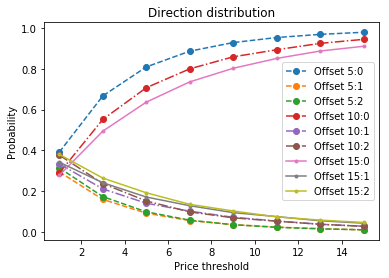

In [8]:
fig = plt.figure()
ax = plt.gca()
Value_Prob_5.plot(ax = ax, marker='o', style='--')
legend_5 = ['Offset 5:{}'.format(x) for x in [0,1,2]]
Value_Prob_10.plot(ax = ax, marker='o', style='-.')
legend_10 = ['Offset 10:{}'.format(x) for x in [0,1,2]]
Value_Prob_15.plot(ax = ax, marker='.')
legend_15 = ['Offset 15:{}'.format(x) for x in [0,1,2]]

plt.legend(legend_5+legend_10+legend_15)
ax.set_title('Direction distribution')
ax.set_ylabel('Probability')
ax.set_xlabel('Price threshold')

-----

# 2. Check the probability table

In [9]:
ptb_5_df = pd.concat(ptb_5)
ptb_5_df.index = ptb_5_df.index.droplevel(level=0)
ptb_5_df['len'] = ptb_5_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_5_df[ptb_5_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.66666667 0.33333333]

Prior length:3 	0,1,2: [0.55555556 0.38888889 0.05555556]

Prior length:4 	0,1,2: [0.53703704 0.42592593 0.03703704]

Prior length:5 	0,1,2: [0.51234568 0.41975309 0.06790123]

Prior length:6 	0,1,2: [0.41563786 0.41563786 0.16872428]

Prior length:7 	0,1,2: [0.39643347 0.31069959 0.29286694]

Prior length:8 	0,1,2: [0.4961134  0.27572016 0.22816644]


In [10]:
ptb_10_df = pd.concat(ptb_10)
ptb_10_df.index = ptb_10_df.index.droplevel(level=0)
ptb_10_df['len'] = ptb_10_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_10_df[ptb_10_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.83333333 0.16666667]

Prior length:3 	0,1,2: [0.66666667 0.27777778 0.05555556]

Prior length:4 	0,1,2: [0.51851852 0.46296296 0.01851852]

Prior length:5 	0,1,2: [0.48765432 0.46296296 0.04938272]

Prior length:6 	0,1,2: [0.41358025 0.37860082 0.20781893]

Prior length:7 	0,1,2: [0.42043896 0.30521262 0.27434842]

Prior length:8 	0,1,2: [0.65363512 0.18038409 0.1659808 ]


In [11]:
ptb_15_df = pd.concat(ptb_15)
ptb_15_df.index = ptb_15_df.index.droplevel(level=0)
ptb_15_df['len'] = ptb_15_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_15_df[ptb_15_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.83333333 0.16666667]

Prior length:3 	0,1,2: [0.55555556 0.44444444]

Prior length:4 	0,1,2: [0.55555556 0.42592593 0.01851852]

Prior length:5 	0,1,2: [0.45061728 0.42592593 0.12345679]

Prior length:6 	0,1,2: [0.37037037 0.32716049 0.30246914]

Prior length:7 	0,1,2: [0.50411523 0.260631   0.23525377]

Prior length:8 	0,1,2: [0.70827618 0.15363512 0.13808871]


# 3. Check the generated signal

In [12]:
params = RbConfig(frequency=5, price='MidPrice')

slm_5 = ptb_5_df.groupby(['prior']).sum().reset_index()
slm_5['signal'] = slm_5.loc[:, '0':'2'].idxmax(axis=1)

signal_5 = MajorSeriesTest(mj_test_5, params.output_path, slm_5,  price=params.price)
signal_5.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_5.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 5min
Prior length:2 	0,1,2: [0.51017442 0.48982558]
Prior length:3 	0,1,2: [0.51017442 0.4878876  0.00193798]
Prior length:4 	0,1,2: [0.58624031 0.41303295 0.00072674]
Prior length:5 	0,1,2: [0.53367248 0.44985465 0.01647287]
Prior length:6 	0,1,2: [0.49636628 0.45760659 0.04602713]
Prior length:7 	0,1,2: [0.45276163 0.44476744 0.10247093]


In [13]:
params = RbConfig(frequency=10, price='MidPrice')

slm_10 = ptb_10_df.groupby(['prior']).sum().reset_index()
slm_10['signal'] = slm_10.loc[:, '0':'2'].idxmax(axis=1)

signal_10 = MajorSeriesTest(mj_test_10, params.output_path, slm_10, price=params.price)
signal_10.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_10.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 10min
Prior length:2 	0,1,2: [0.72431668 0.27568332]
Prior length:3 	0,1,2: [0.6866164 0.3133836]
Prior length:4 	0,1,2: [7.05466541e-01 2.94062205e-01 4.71253534e-04]
Prior length:5 	0,1,2: [0.58576814 0.40716305 0.0070688 ]
Prior length:6 	0,1,2: [0.55466541 0.41328935 0.03204524]
Prior length:7 	0,1,2: [0.45098963 0.43590952 0.11310085]


In [14]:
params = RbConfig(frequency=15, price='MidPrice')

slm_15 = ptb_15_df.groupby(['prior']).sum().reset_index()
slm_15['signal'] = slm_15.loc[:, '0':'2'].idxmax(axis=1)

signal_15 = MajorSeriesTest(mj_test_15, params.output_path, slm_15, price=params.price)
signal_15.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_15.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 15min
Prior length:2 	0,1,2: [0.68900804 0.31099196]
Prior length:3 	0,1,2: [0.78552279 0.21246649 0.00201072]
Prior length:4 	0,1,2: [0.61461126 0.3766756  0.00871314]
Prior length:5 	0,1,2: [0.53418231 0.38404826 0.08176944]
Prior length:6 	0,1,2: [0.46782842 0.40080429 0.13136729]
Prior length:7 	0,1,2: [0.40549598 0.35254692 0.2419571 ]


----
# Backtest

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.236053,0.005989,-0.002520,0.001489,0.000157,-0.022190,0.019120,-0.102144,0.590755,6.342946,2211,1.402348,0.624604
1,0.231849,0.003607,-0.002639,0.001452,0.000106,-0.022190,0.019120,-0.069903,0.549972,3.889150,1965,1.221370,0.664631
2,0.251681,0.005129,-0.002624,0.001630,0.000146,-0.023808,0.019120,-0.056385,0.620990,5.095215,2031,1.334147,0.613983
3,0.236990,0.004807,-0.002343,0.001777,0.000136,-0.022999,0.019120,-0.071043,0.758550,5.070616,2055,1.309408,0.582482
4,0.257133,0.003939,-0.002378,0.001899,0.000118,-0.019870,0.023811,-0.073477,0.798559,3.830022,1939,1.245166,0.547705
5,0.229358,0.002229,-0.002299,0.002029,0.000072,-0.018456,0.024255,-0.087437,0.882539,2.429666,1791,1.127580,0.526521
6,0.258801,0.002554,-0.002273,0.002019,0.000081,-0.020013,0.023811,-0.081133,0.888377,2.467373,1825,1.149046,0.519452


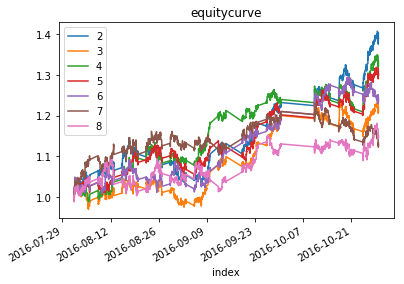

In [15]:
from config import BuConfig
params=RbConfig(frequency=5, price='MidPrice')

Rb_5_test = MajorSeriesTest(mj_test_5, params.output_path, slm_5, price=params.price )
Rb_5_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Rb_5_test.run()
Rb_5_test.plot()
Rb_5_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.267946,0.001005,NaN,0.058312,0.029156,0.000000,0.058312,-0.161972,NaN,0.938036,2,1.050896,0.500000
1,0.288384,-0.001648,-0.003050,0.002397,-0.000091,-0.029321,0.025218,-0.176867,0.785876,-1.428797,1048,0.900989,0.522901
2,0.268324,0.000380,-0.003572,0.002406,0.000025,-0.028472,0.018419,-0.139577,0.673677,0.353697,867,1.013443,0.575548
3,0.263943,0.000560,-0.003200,0.002826,0.000037,-0.029294,0.023601,-0.146167,0.883216,0.530281,874,1.024096,0.508009
4,0.230632,0.002473,-0.003118,0.002738,0.000149,-0.022775,0.017605,-0.079460,0.877865,2.681008,965,1.144297,0.543005
5,0.268408,0.003035,-0.002910,0.003013,0.000178,-0.024452,0.022478,-0.066694,1.035322,2.826594,987,1.182185,0.501520
6,0.257022,0.001477,-0.003096,0.003011,0.000096,-0.018596,0.021502,-0.068247,0.972548,1.436877,897,1.080072,0.500557


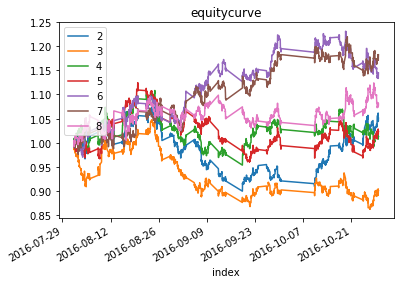

In [16]:
params=RbConfig(frequency=10, price='MidPrice')

Rb_10_test = MajorSeriesTest(mj_test_10, params.output_path, slm_10, price=params.price )
Rb_10_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Rb_10_test.run()
Rb_10_test.plot()
Rb_10_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.290236,0.002054,-0.004500,0.002550,0.000152,-0.024335,0.017559,-0.157483,0.566735,1.768838,783,1.116557,0.611750
1,0.244100,-0.001378,-0.005922,0.003202,-0.000189,-0.028884,0.023601,-0.159525,0.540701,-1.411604,422,0.915026,0.611374
2,0.268985,0.001607,-0.005140,0.003677,0.000212,-0.028884,0.021893,-0.131954,0.715345,1.493121,440,1.087975,0.581818
3,0.267148,-0.001238,-0.004061,0.002929,-0.000096,-0.026035,0.021058,-0.167798,0.721216,-1.158247,750,0.922521,0.529333
4,0.317369,-0.003884,-0.003903,0.003141,-0.000310,-0.029358,0.021579,-0.263248,0.804854,-3.059502,727,0.791261,0.477304
5,0.313513,-0.001790,-0.004304,0.003349,-0.000170,-0.025616,0.018794,-0.156884,0.778120,-1.426987,609,0.893468,0.504105
6,0.276865,0.002439,-0.004211,0.004039,0.000267,-0.024566,0.026594,-0.095554,0.959107,2.202201,529,1.141800,0.527410


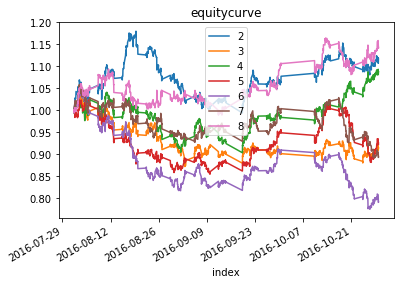

In [17]:
params=RbConfig(frequency=15, price='MidPrice')

Rb_15_test = MajorSeriesTest(mj_test_15, params.output_path, slm_15, price=params.price )
Rb_15_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Rb_15_test.run()
Rb_15_test.plot()
Rb_15_test.performance